In [32]:
tags = { "C0": "safe driving",
"C1": "texting - right",
"C2": "talking on the phone - right",
"C3": "texting - left",
"C4": "talking on the phone - left",
"C5": "operating the radio",
"C6": "drinking",
"C7": "reaching behind",
"C8": "hair and makeup",
"C9": "talking to passenger" }

In [33]:
import tensorflow as tf
import numpy as np 
import cv2
from tensorflow import keras
from tensorflow.keras import models
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
def create_model(path):
  return models.load_model(path)

In [35]:
# Path to IS.h5
model = create_model("/Users/nguyenanhhoangphuc/Documents/semester201/IS/assignment/cs229/model/IS.h5") 
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Image_input (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
predictions (Dense)          (None, 10)                250890    
Total params: 14,965,578
Trainable params: 14,965,578
Non-trainable params: 0
_________________________________________________________________


Image number: 0
Image number: 1
Image number: 2
Image number: 3
Image number: 4
Image number: 5
Image number: 6
Image number: 7
Image number: 8
Image number: 9
Image number: 10
Image number: 11
Image number: 12
Image number: 13
Image number: 14
Image number: 15
Image number: 16
Image number: 17
Image number: 18
Image number: 19


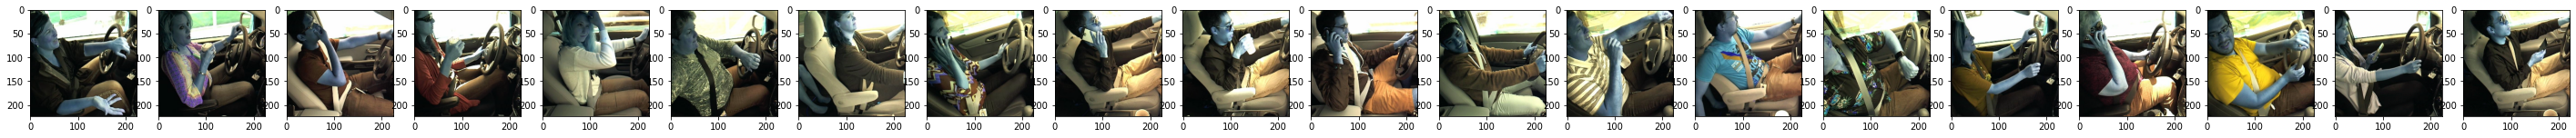

In [36]:
# labels is the image array
test_image = []
i = 0
fig, ax = plt.subplots(1, 20, figsize = (50,50 ))

files = os.listdir('./data/imgs/test')
nums = np.random.randint(low=1, high=len(files), size=20)
for i in range(20):
    print ('Image number:',i)
    imgpath = os.path.join('./data/imgs/test',files[nums[i]])
    img = cv2.imread(imgpath)
    #img = color.rgb2gray(img)
    img = img[50:,120:-50]
    img = cv2.resize(img,(224,224))
    test_image.append(img)
    ax[i].imshow(img,cmap = 'gray')
    plt.show

In [37]:
test = []

for img in test_image:
    test.append(img)

test = np.array(test).reshape(-1,224,224,3)
prediction = model.predict(test)

In [38]:
prediction[0]

array([5.4136008e-02, 2.1930067e-07, 8.9027425e-09, 1.6628477e-05,
       1.6176458e-06, 8.9959604e-01, 7.3814779e-05, 2.2881087e-03,
       3.9405916e-03, 3.9947037e-02], dtype=float32)

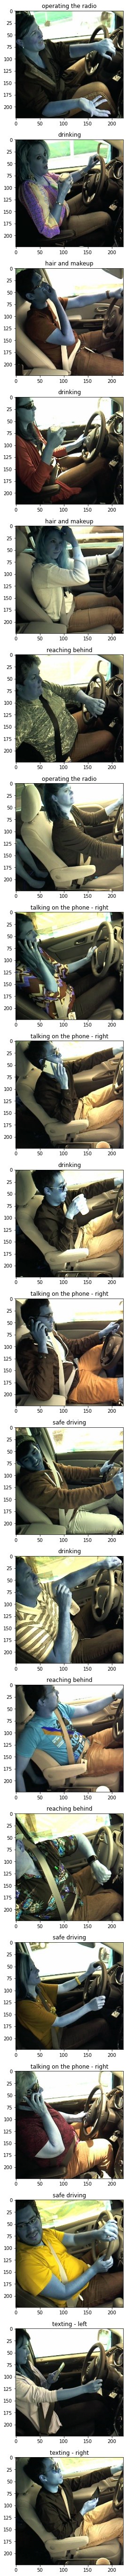

In [39]:
# labels is the image array
i = 0
fig, ax = plt.subplots(20, 1, figsize = (100,100))

for i in range(20):
    ax[i].imshow(test[i].squeeze())
    predicted_class = 'C'+str(np.where(prediction[i] == np.amax(prediction[i]))[0][0])
    ax[i].set_title(tags[predicted_class])
    plt.show